#Intelligente Systeme Hausarbeit K-Means/Birch Programm Code


---



##*K-Means Algorithmus*

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Der Silhouettenkoeffizient ist : 0.5708


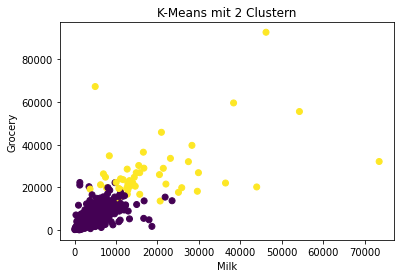

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Laden des Datensatzes
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(url)

# 'Channel' und 'Region' Splate entfernen, da sie gar nicht gebraucht werden.
df = df.drop(['Channel', 'Region'], axis=1)

# Skaliere die Daten mit dem MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# K-Means anwenden
cluster_amount = 2 #! Hier kann der Parameter angepasst werden
kmeans = KMeans(n_clusters=cluster_amount)
clusters = kmeans.fit_predict(df_scaled)

# Silhouettenkoeffizient berechnen
silhouette_avg = silhouette_score(df_scaled, clusters)
print(f"Der Silhouettenkoeffizient ist : {silhouette_avg:.4f}")


# Visualisiere den Cluster mit einem Scatter plot
x = 'Milk'
y = 'Grocery'
plt.scatter(df[x], df[y], c=clusters)
plt.xlabel(x)
plt.ylabel(y)
plt.title(f"K-Means mit {cluster_amount} Clustern")
plt.show()

Der "FutureWarning" ist nicht sonderlich wichtig und braucht nicht beachetet zu werden.

##*BIRCH Algorithmus*

Der Silhouettenkoeffizient ist : 0.7594


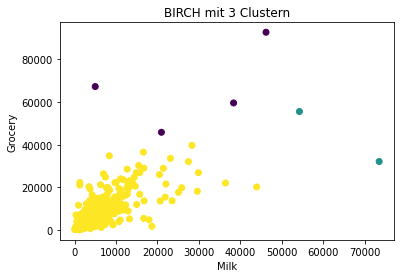

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Laden des Datensatzes
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(url)

# 'Channel' und 'Region' Splate entfernen, da sie gar nicht gebraucht werden.
df = df.drop(['Channel', 'Region'], axis=1)

# Skaliere die Daten mit dem MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# BIRCH anwenden
birch = Birch(threshold=0.26, branching_factor=50)#! Hier kann der Parameter angepasst werden
clusters = birch.fit_predict(df_scaled)
cluster_amount = birch.n_clusters

# Silhouettenkoeffizient berechnen
silhouette_avg = silhouette_score(df_scaled, clusters)
print(f"Der Silhouettenkoeffizient ist : {silhouette_avg:.4f}")

# Visualisiere den Cluster mit einem Scatter plot
x = 'Milk'
y = 'Grocery'
plt.scatter(df[x], df[y], c=clusters)
plt.xlabel(x)
plt.ylabel(y)
plt.title(f"BIRCH mit {cluster_amount} Clustern")
plt.show()

##*Kombination von BIRCH und K-Means*

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Der Silhouettenkoeffizient ist : 0.5424


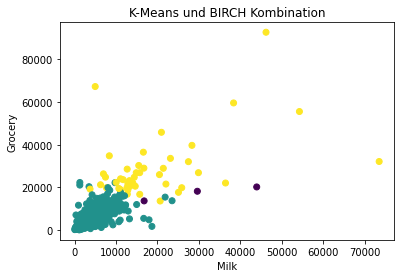

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, Birch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Laden des Datensatzes
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(url)

# 'Channel' und 'Region' Splate entfernen, da sie gar nicht gebraucht werden.
df = df.drop(['Channel', 'Region'], axis=1)

# Skaliere die Daten mit dem MinMaxScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Birch anwenden um die initialen Cluster zu ermitteln
birch = Birch(branching_factor=50, threshold=0.26)
birch.fit(df_scaled)

# Verwende K-Means, um die von Birch identifizierten Cluster zu verfeinern.
km = KMeans(n_clusters=birch.n_clusters)
km.fit(df_scaled)

# Silhouettenkoeffizient berechnen
silhouette_avg = silhouette_score(df_scaled, km.labels_)
print(f"Der Silhouettenkoeffizient ist : {silhouette_avg:.4f}")

# Visualisiere den Cluster mit einem Scatter plot
x = 'Milk'
y = 'Grocery'
plt.scatter(df[x], df[y], c=km.labels_)
plt.title("K-Means und BIRCH Kombination")
plt.xlabel(x)
plt.ylabel(y)
plt.show()

Der "FutureWarning" ist nicht sonderlich wichtig und braucht nicht beachetet zu werden.